In [1]:
!pip install scikit-plot

In [0]:
%matplotlib inline
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report, balanced_accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from keras import backend as K
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve

In [0]:
def keras_internal_binary_classification_accuracy(y_true, y_pred):
    return K.mean(K.equal(y_true, K.round(y_pred)))

In [0]:
def custom_accuracy(y_true, y_pred):
    y_pred_pos = K.round(K.clip(y_pred, 0, 1))
    y_pred_neg = 1 - y_pred_pos

    y_pos = K.round(K.clip(y_true, 0, 1))
    y_neg = 1 - y_pos

    tp = K.sum(y_pos * y_pred_pos)
    tn = K.sum(y_neg * y_pred_neg)

    fp = K.sum(y_neg * y_pred_pos)
    fn = K.sum(y_pos * y_pred_neg)

    numerator = (tp + tn)
    denominator = (tp + tn + fp + fn)

    return numerator / (denominator + K.epsilon())

In [5]:
from google.colab import files
uploaded = files.upload()

Saving train_pronto.csv to train_pronto.csv


In [0]:
df = uploaded

In [0]:
df = pd.read_csv('train_pronto.csv')

In [0]:
df.drop(['Unnamed: 0', 'weekend'], axis = 1, inplace = True)

In [0]:
class_name = 'Occupancy'
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

NO REGULARIZATION MODELLO 1

In [0]:
def build_model():
    
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(128, input_dim=n_feature, activation='relu', kernel_initializer = 'uniform'))
    model.add(Dense(64, activation='relu', kernel_initializer = 'uniform'))
    model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dense(16, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dense(1, activation='sigmoid', kernel_initializer = 'uniform'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[custom_accuracy, 'accuracy'])
    return model

In [0]:
def build_model1():
    
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(128, input_dim=n_feature, activation='relu', kernel_initializer = 'uniform'))
    model.add(Dense(64, activation='relu', kernel_initializer = 'uniform'))
    model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dense(16, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dense(1, activation='sigmoid', kernel_initializer = 'uniform'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[custom_accuracy, 'accuracy'])
    return model

In [0]:
def build_model2():
    
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(128, input_dim=n_feature, activation='relu', kernel_initializer = 'uniform'))
    model.add(Dense(64, activation='relu', kernel_initializer = 'uniform'))
    model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dense(16, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dense(1, activation='sigmoid', kernel_initializer = 'uniform'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[custom_accuracy, 'accuracy'])
    return model

In [0]:
def build_model3():
    
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(128, input_dim=n_feature, activation='relu', kernel_initializer = 'uniform'))
    model.add(Dense(64, activation='relu', kernel_initializer = 'uniform'))
    model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dense(16, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dense(1, activation='sigmoid', kernel_initializer = 'uniform'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[custom_accuracy, 'accuracy'])
    return model

In [0]:
es = EarlyStopping(monitor='val_loss', patience=15)
mc = ModelCheckpoint('best_model_NOREG.h5', monitor='val_loss', save_best_only=True)

In [15]:
model = build_model()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, callbacks = [es, mc], batch_size=10).history
model1 = build_model1()
history1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, callbacks = [es, mc], batch_size=50).history
model2 = build_model2()
history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, callbacks = [es, mc], batch_size=100).history
model3 = build_model3()
history3 = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, callbacks = [es, mc], batch_size=200).history

Train on 11513 samples, validate on 4935 samples
Epoch 1/500
11513/11513 [==============================] - 2s 185us/step - loss: 0.1277 - custom_accuracy: 0.9450 - accuracy: 0.9449 - val_loss: 0.0791 - val_custom_accuracy: 0.9628 - val_accuracy: 0.9627
Epoch 2/500
11513/11513 [==============================] - 2s 156us/step - loss: 0.0736 - custom_accuracy: 0.9752 - accuracy: 0.9752 - val_loss: 0.0795 - val_custom_accuracy: 0.9711 - val_accuracy: 0.9710
Epoch 3/500
11513/11513 [==============================] - 2s 154us/step - loss: 0.0623 - custom_accuracy: 0.9838 - accuracy: 0.9838 - val_loss: 0.0520 - val_custom_accuracy: 0.9866 - val_accuracy: 0.9866
Epoch 4/500
11513/11513 [==============================] - 2s 155us/step - loss: 0.0558 - custom_accuracy: 0.9848 - accuracy: 0.9848 - val_loss: 0.0598 - val_custom_accuracy: 0.9783 - val_accuracy: 0.9783
Epoch 5/500
11513/11513 [==============================] - 2s 156us/step - loss: 0.0568 - custom_accuracy: 0.9849 - accuracy: 0.984

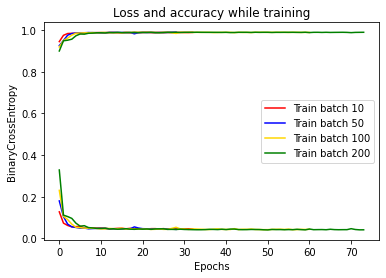

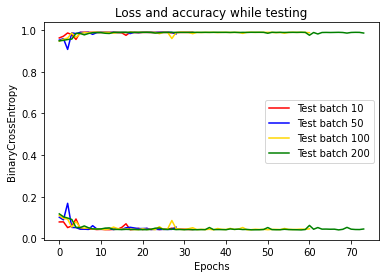

In [16]:
plt.plot(history['loss'], color = 'red', label = 'Train batch 10')
plt.plot(history['accuracy'], color = 'red')
plt.plot(history1['loss'], color = 'blue', label = 'Train batch 50')
plt.plot(history1['accuracy'], color = 'blue')
plt.plot(history2['loss'], color = 'gold', label = 'Train batch 100')
plt.plot(history2['accuracy'], color = 'gold')
plt.plot(history3['loss'], color = 'green', label = 'Train batch 200')
plt.plot(history3['accuracy'], color = 'green')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('BinaryCrossEntropy')
plt.title('Loss and accuracy while training')
plt.show()
plt.plot(history['val_loss'], color = 'red', label = 'Test batch 10')
plt.plot(history['val_accuracy'], color = 'red')
plt.plot(history1['val_loss'], color = 'blue', label = 'Test batch 50')
plt.plot(history1['val_accuracy'], color = 'blue')
plt.plot(history2['val_loss'], color = 'gold', label = 'Test batch 100')
plt.plot(history2['val_accuracy'], color = 'gold')
plt.plot(history3['val_loss'], color = 'green', label = 'Test batch 200')
plt.plot(history3['val_accuracy'], color = 'green')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('BinaryCrossEntropy')
plt.title('Loss and accuracy while testing')
plt.show()

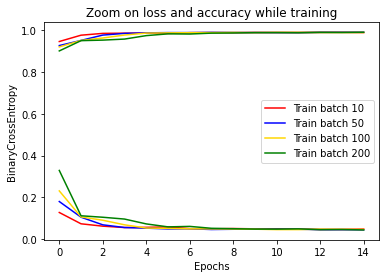

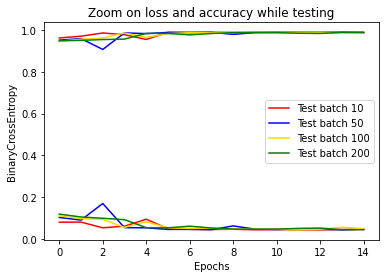

In [17]:
plt.plot(history['loss'][:15], color = 'red', label = 'Train batch 10')
plt.plot(history['accuracy'][:15], color = 'red')
plt.plot(history1['loss'][:15], color = 'blue', label = 'Train batch 50')
plt.plot(history1['accuracy'][:15], color = 'blue')
plt.plot(history2['loss'][:15], color = 'gold', label = 'Train batch 100')
plt.plot(history2['accuracy'][:15], color = 'gold')
plt.plot(history3['loss'][:15], color = 'green', label = 'Train batch 200')
plt.plot(history3['accuracy'][:15], color = 'green')
plt.xlabel('Epochs')
plt.ylabel('BinaryCrossEntropy')
plt.title('Zoom on loss and accuracy while training')
plt.legend()
plt.show()
plt.plot(history['val_loss'][:15], color = 'red', label = 'Test batch 10')
plt.plot(history['val_accuracy'][:15], color = 'red')
plt.plot(history1['val_loss'][:15], color = 'blue', label = 'Test batch 50')
plt.plot(history1['val_accuracy'][:15], color = 'blue')
plt.plot(history2['val_loss'][:15], color = 'gold', label = 'Test batch 100')
plt.plot(history2['val_accuracy'][:15], color = 'gold')
plt.plot(history3['val_loss'][:15], color = 'green', label = 'Test batch 200')
plt.plot(history3['val_accuracy'][:15], color = 'green')
plt.xlabel('Epochs')
plt.ylabel('BinaryCrossEntropy')
plt.title('Zoom on loss and accuracy while testing')
plt.legend()
plt.show()

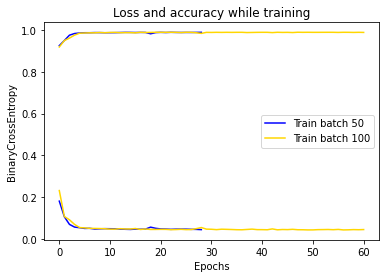

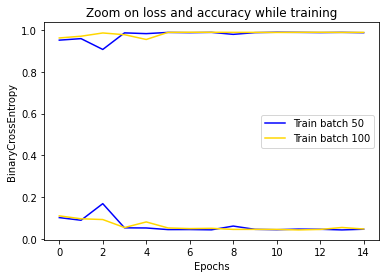

In [18]:
plt.plot(history1['loss'], color = 'blue', label = 'Train batch 50')
plt.plot(history1['accuracy'], color = 'blue')
plt.plot(history2['loss'], color = 'gold', label = 'Train batch 100')
plt.plot(history2['accuracy'], color = 'gold')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('BinaryCrossEntropy')
plt.title('Loss and accuracy while training')
plt.show()
plt.plot(history1['val_loss'][:15], color = 'blue', label = 'Train batch 50')
plt.plot(history1['val_accuracy'][:15], color = 'blue')
plt.plot(history2['val_loss'][:15], color = 'gold', label = 'Train batch 100')
plt.plot(history['val_accuracy'][:15], color = 'gold')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('BinaryCrossEntropy')
plt.title('Zoom on loss and accuracy while training')
plt.show()

In [0]:
#UFFICIALE BATCH 50

In [20]:
test_loss, test_custom_acc, test_acc = model.evaluate(X_test, y_test)
test_loss_1, test_custom_acc_1, test_acc_1 = model1.evaluate(X_test, y_test)
test_loss_2, test_custom_acc_2, test_acc_2 = model2.evaluate(X_test, y_test)
test_loss_3, test_custom_acc_3, test_acc_3 = model3.evaluate(X_test, y_test)

print('Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss, test_custom_acc, test_acc))
print('Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_1, test_custom_acc_1, test_acc_1))
print('Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_2, test_custom_acc_2, test_acc_2))
print('Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_3, test_custom_acc_3, test_acc_3))

4935/4935 [==============================] - 0s 19us/step
Loss 0.043088, Custom Accuracy 0.989516, Keras Accuracy 0.989463
Loss 0.054436, Custom Accuracy 0.982056, Keras Accuracy 0.981966
Loss 0.046030, Custom Accuracy 0.988105, Keras Accuracy 0.988045
Loss 0.045236, Custom Accuracy 0.986290, Keras Accuracy 0.986221


In [21]:
modelli = [model, model1, model2, model3]
k = 1
for i in modelli:
  print('MODELLO NUMERO: ',k)
  k +=1 
  y_pred = i.predict_classes(X_test)

  print('Accuracy %s' % accuracy_score(y_test, y_pred))
  print('F1-score %s' % f1_score(y_test, y_pred, average=None))
  print(classification_report(y_test, y_pred))
  

MODELLO NUMERO:  1
Accuracy 0.9894630192502533
F1-score [0.99309979 0.97772065]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3791
           1       0.96      1.00      0.98      1144

    accuracy                           0.99      4935
   macro avg       0.98      0.99      0.99      4935
weighted avg       0.99      0.99      0.99      4935

MODELLO NUMERO:  2
Accuracy 0.9819655521783182
F1-score [0.98826941 0.96101621]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3791
           1       0.96      0.96      0.96      1144

    accuracy                           0.98      4935
   macro avg       0.98      0.97      0.97      4935
weighted avg       0.98      0.98      0.98      4935

MODELLO NUMERO:  3
Accuracy 0.9880445795339412
F1-score [0.99216363 0.9747971 ]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      37

In [0]:
#PRENDO IL MODELLO 3 (numero 2)

In [0]:
y_score = model2.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score)
roc_auc0 = auc(fpr0, tpr0)

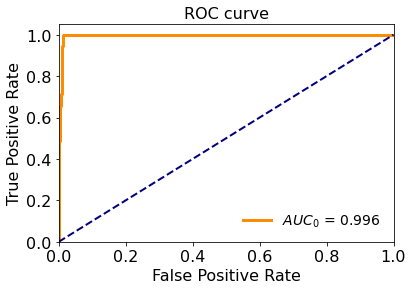

In [24]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()


In [26]:
plot_lift_curve(y_test, y_score)
plt.show()

IndexError: ignored

REGULARIZATION MODELLO 2

In [0]:
from keras.regularizers import l2
def build_L2_model():
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(128, input_dim=n_feature, activation='relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.1)))
    model.add(Dense(64, activation='relu', kernel_initializer = 'uniform', kernel_regularizer = l2(0.1)))
    model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform', kernel_regularizer = l2(0.1)))
    model.add(Dense(16, activation = 'relu', kernel_initializer = 'uniform',kernel_regularizer = l2(0.1)))
    model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'uniform' ))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[custom_accuracy,'accuracy'])
    return model

In [0]:
def build_L2_model1():
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(128, input_dim=n_feature, activation='relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.1)))
    model.add(Dense(64, activation='relu', kernel_initializer = 'uniform', kernel_regularizer = l2(0.1)))
    model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform', kernel_regularizer = l2(0.1)))
    model.add(Dense(16, activation = 'relu', kernel_initializer = 'uniform'))
    model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'uniform' ))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[custom_accuracy, 'accuracy'])
    return model

In [0]:
def build_L2_model2():
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(128, input_dim=n_feature, activation='relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.1)))
    model.add(Dense(64, activation='relu', kernel_initializer = 'uniform', kernel_regularizer = l2(0.1)))
    model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform'))
    model.add(Dense(16, activation = 'relu', kernel_initializer = 'uniform'))
    model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'uniform' ))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[custom_accuracy, 'accuracy'])
    return model

In [0]:
def build_L2_model3():
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(128, input_dim=n_feature, activation='relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.1)))
    model.add(Dense(64, activation='relu', kernel_initializer = 'uniform'))
    model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform'))
    model.add(Dense(16, activation = 'relu', kernel_initializer = 'uniform'))
    model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'uniform' ))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[custom_accuracy, 'accuracy'])
    return model

In [0]:
esl2 = EarlyStopping(monitor='val_loss', patience=15)
mcl2 = ModelCheckpoint('best_model_L2.h5', monitor='loss', save_best_only=True)

In [66]:
L2_model = build_L2_model()
h_L2 = L2_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=10, callbacks=[esl2, mcl2]).history
L2_model1 = build_L2_model()                    
h_L21 = L2_model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=50, callbacks=[esl2, mcl2]).history
L2_model2 = build_L2_model()                    
h_L22 = L2_model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=100, callbacks=[esl2, mcl2]).history
L2_model3 = build_L2_model()                    
h_L23 = L2_model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=200, callbacks=[esl2, mcl2]).history         

11513/11513 [==============================] - 2s 154us/step - loss: 0.1338 - custom_accuracy: 0.9828 - accuracy: 0.9828 - val_loss: 0.1228 - val_custom_accuracy: 0.9889 - val_accuracy: 0.9889
Epoch 5/500
11513/11513 [==============================] - 2s 154us/step - loss: 0.1165 - custom_accuracy: 0.9830 - accuracy: 0.9832 - val_loss: 0.1063 - val_custom_accuracy: 0.9889 - val_accuracy: 0.9889
Epoch 6/500
11513/11513 [==============================] - 2s 157us/step - loss: 0.1033 - custom_accuracy: 0.9835 - accuracy: 0.9835 - val_loss: 0.0955 - val_custom_accuracy: 0.9887 - val_accuracy: 0.9887
Epoch 7/500
11513/11513 [==============================] - 2s 155us/step - loss: 0.0952 - custom_accuracy: 0.9852 - accuracy: 0.9851 - val_loss: 0.0920 - val_custom_accuracy: 0.9889 - val_accuracy: 0.9889
Epoch 8/500
11513/11513 [==============================] - 2s 157us/step - loss: 0.0927 - custom_accuracy: 0.9839 - accuracy: 0.9838 - val_loss: 0.0893 - val_custom_accuracy: 0.9889 - val_accu

KeyboardInterrupt: ignored

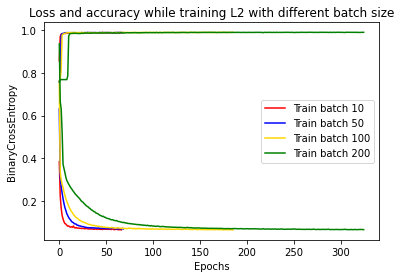

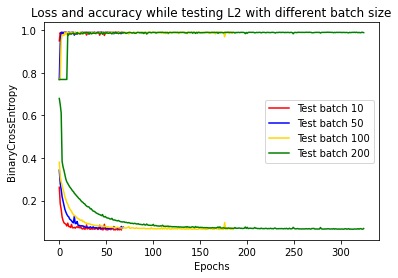

In [0]:
plt.plot(h_L2['loss'], color = 'red', label = 'Train batch 10')
plt.plot(h_L2['accuracy'], color = 'red')
plt.plot(h_L21['loss'], color = 'blue', label = 'Train batch 50')
plt.plot(h_L21['accuracy'], color = 'blue')
plt.plot(h_L22['loss'], color = 'gold', label = 'Train batch 100')
plt.plot(h_L22['accuracy'], color = 'gold')
plt.plot(h_L23['loss'], color = 'green', label = 'Train batch 200')
plt.plot(h_L23['accuracy'], color = 'green')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('BinaryCrossEntropy')
plt.title('Loss and accuracy while training L2 with different batch size')
plt.show()
plt.plot(h_L2['val_loss'], color = 'red', label = 'Test batch 10')
plt.plot(h_L2['val_accuracy'], color = 'red')
plt.plot(h_L21['val_loss'], color = 'blue', label = 'Test batch 50')
plt.plot(h_L21['val_accuracy'], color = 'blue')
plt.plot(h_L22['val_loss'], color = 'gold', label = 'Test batch 100')
plt.plot(h_L22['val_accuracy'], color = 'gold')
plt.plot(h_L23['val_loss'], color = 'green', label = 'Test batch 200')
plt.plot(h_L23['val_accuracy'], color = 'green')
plt.xlabel('Epochs')
plt.ylabel('BinaryCrossEntropy')
plt.title('Loss and accuracy while testing L2 with different batch size')
plt.legend()
plt.show()

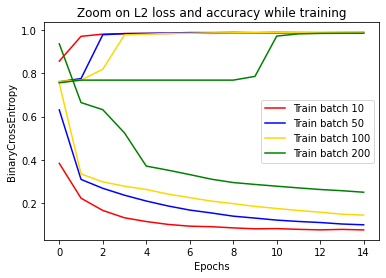

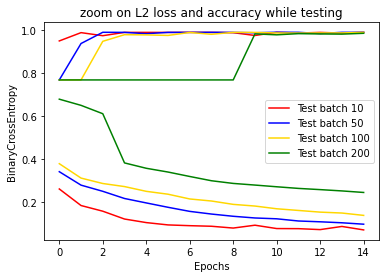

In [0]:
plt.plot(h_L2['loss'][:15], color = 'red', label = 'Train batch 10')
plt.plot(h_L2['accuracy'][:15], color = 'red')
plt.plot(h_L21['loss'][:15], color = 'blue', label = 'Train batch 50')
plt.plot(h_L21['accuracy'][:15], color = 'blue')
plt.plot(h_L22['loss'][:15], color = 'gold', label = 'Train batch 100')
plt.plot(h_L22['accuracy'][:15], color = 'gold')
plt.plot(h_L23['loss'][:15], color = 'green', label = 'Train batch 200')
plt.plot(h_L23['accuracy'][:15], color = 'green')
plt.xlabel('Epochs')
plt.ylabel('BinaryCrossEntropy')
plt.title('Zoom on L2 loss and accuracy while training')
plt.legend()
plt.show()
plt.plot(h_L2['val_loss'][:15], color = 'red', label = 'Test batch 10')
plt.plot(h_L2['val_accuracy'][:15], color = 'red')
plt.plot(h_L21['val_loss'][:15], color = 'blue', label = 'Test batch 50')
plt.plot(h_L21['val_accuracy'][:15], color = 'blue')
plt.plot(h_L22['val_loss'][:15], color = 'gold', label = 'Test batch 100')
plt.plot(h_L22['val_accuracy'][:15], color = 'gold')
plt.plot(h_L23['val_loss'][:15], color = 'green', label = 'Test batch 200')
plt.plot(h_L23['val_accuracy'][:15], color = 'green')
plt.xlabel('Epochs')
plt.ylabel('BinaryCrossEntropy')
plt.title('zoom on L2 loss and accuracy while testing')
plt.legend()
plt.show()

In [0]:
# mi piace batch 10 in questo caso... quindi h_L2 passa alla fase successiva

In [0]:
L21_model = build_L2_model1()
h1_L2 = L21_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=10, callbacks=[esl2, mcl2]).history
L21_model1 = build_L2_model1()                    
h1_L21 = L21_model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=50, callbacks=[esl2, mcl2]).history
L21_model2 = build_L2_model1()                    
h1_L22 = L21_model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=100, callbacks=[esl2, mcl2]).history
L21_model3 = build_L2_model1()                    
h1_L23 = L21_model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=200, callbacks=[esl2, mcl2]).history  

Train on 11513 samples, validate on 4935 samples
Epoch 1/500
11513/11513 [==============================] - 2s 171us/step - loss: 0.2756 - custom_accuracy: 0.9237 - accuracy: 0.9237 - val_loss: 0.1803 - val_custom_accuracy: 0.9619 - val_accuracy: 0.9619
Epoch 2/500
11513/11513 [==============================] - 2s 157us/step - loss: 0.1256 - custom_accuracy: 0.9849 - accuracy: 0.9849 - val_loss: 0.0964 - val_custom_accuracy: 0.9895 - val_accuracy: 0.9895
Epoch 3/500
11513/11513 [==============================] - 2s 159us/step - loss: 0.0883 - custom_accuracy: 0.9855 - accuracy: 0.9855 - val_loss: 0.0864 - val_custom_accuracy: 0.9802 - val_accuracy: 0.9801
Epoch 4/500
11513/11513 [==============================] - 2s 157us/step - loss: 0.0749 - custom_accuracy: 0.9852 - accuracy: 0.9852 - val_loss: 0.0661 - val_custom_accuracy: 0.9885 - val_accuracy: 0.9884
Epoch 5/500
11513/11513 [==============================] - 2s 159us/step - loss: 0.0708 - custom_accuracy: 0.9853 - accuracy: 0.985

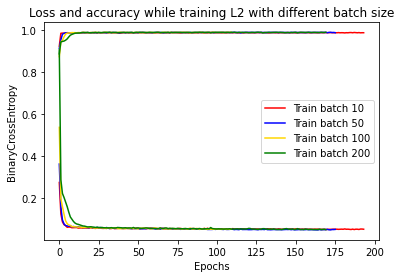

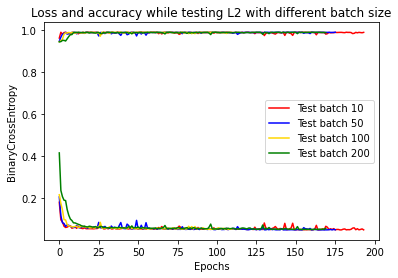

In [0]:
plt.plot(h1_L2['loss'], color = 'red', label = 'Train batch 10')
plt.plot(h1_L2['accuracy'], color = 'red')
plt.plot(h1_L21['loss'], color = 'blue', label = 'Train batch 50')
plt.plot(h1_L21['accuracy'], color = 'blue')
plt.plot(h1_L22['loss'], color = 'gold', label = 'Train batch 100')
plt.plot(h1_L22['accuracy'], color = 'gold')
plt.plot(h1_L23['loss'], color = 'green', label = 'Train batch 200')
plt.plot(h1_L23['accuracy'], color = 'green')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('BinaryCrossEntropy')
plt.title('Loss and accuracy while training L2 with different batch size')
plt.show()
plt.plot(h1_L2['val_loss'], color = 'red', label = 'Test batch 10')
plt.plot(h1_L2['val_accuracy'], color = 'red')
plt.plot(h1_L21['val_loss'], color = 'blue', label = 'Test batch 50')
plt.plot(h1_L21['val_accuracy'], color = 'blue')
plt.plot(h1_L22['val_loss'], color = 'gold', label = 'Test batch 100')
plt.plot(h1_L22['val_accuracy'], color = 'gold')
plt.plot(h1_L23['val_loss'], color = 'green', label = 'Test batch 200')
plt.plot(h1_L23['val_accuracy'], color = 'green')
plt.xlabel('Epochs')
plt.ylabel('BinaryCrossEntropy')
plt.title('Loss and accuracy while testing L2 with different batch size')
plt.legend()
plt.show()

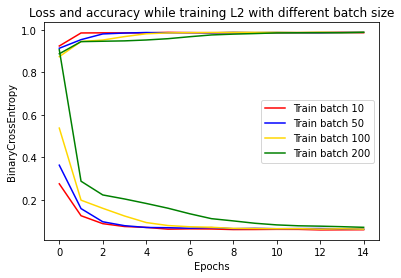

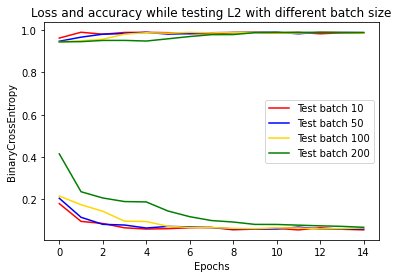

In [0]:
plt.plot(h1_L2['loss'][:15], color = 'red', label = 'Train batch 10')
plt.plot(h1_L2['accuracy'][:15], color = 'red')
plt.plot(h1_L21['loss'][:15], color = 'blue', label = 'Train batch 50')
plt.plot(h1_L21['accuracy'][:15], color = 'blue')
plt.plot(h1_L22['loss'][:15], color = 'gold', label = 'Train batch 100')
plt.plot(h1_L22['accuracy'][:15], color = 'gold')
plt.plot(h1_L23['loss'][:15], color = 'green', label = 'Train batch 200')
plt.plot(h1_L23['accuracy'][:15], color = 'green')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('BinaryCrossEntropy')
plt.title('Loss and accuracy while training L2 with different batch size')
plt.show()
plt.plot(h1_L2['val_loss'][:15], color = 'red', label = 'Test batch 10')
plt.plot(h1_L2['val_accuracy'][:15], color = 'red')
plt.plot(h1_L21['val_loss'][:15], color = 'blue', label = 'Test batch 50')
plt.plot(h1_L21['val_accuracy'][:15], color = 'blue')
plt.plot(h1_L22['val_loss'][:15], color = 'gold', label = 'Test batch 100')
plt.plot(h1_L22['val_accuracy'][:15], color = 'gold')
plt.plot(h1_L23['val_loss'][:15], color = 'green', label = 'Test batch 200')
plt.plot(h1_L23['val_accuracy'][:15], color = 'green')
plt.xlabel('Epochs')
plt.ylabel('BinaryCrossEntropy')
plt.title('Loss and accuracy while testing L2 with different batch size')
plt.legend()
plt.show()

In [0]:
# STAMO LI, COMUNQUE ANCHE STA VOLTA BATCH SIZE 10 BEST OF. h1_L2 passa alla fase successiva

In [0]:
L22_model = build_L2_model2()
h2_L2 = L22_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=10, callbacks=[esl2, mcl2]).history
L22_model1 = build_L2_model2()                    
h2_L21 = L22_model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=50, callbacks=[esl2, mcl2]).history
L22_model2 = build_L2_model2()                    
h2_L22 = L22_model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=100, callbacks=[esl2, mcl2]).history
L22_model3 = build_L2_model2()                    
h2_L23 = L22_model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=200, callbacks=[esl2, mcl2]).history

Train on 11513 samples, validate on 4935 samples
Epoch 1/500
11513/11513 [==============================] - 2s 166us/step - loss: 0.1937 - custom_accuracy: 0.9378 - accuracy: 0.9378 - val_loss: 0.1135 - val_custom_accuracy: 0.9636 - val_accuracy: 0.9635
Epoch 2/500
11513/11513 [==============================] - 2s 154us/step - loss: 0.0788 - custom_accuracy: 0.9801 - accuracy: 0.9801 - val_loss: 0.0552 - val_custom_accuracy: 0.9883 - val_accuracy: 0.9882
Epoch 3/500
11513/11513 [==============================] - 2s 151us/step - loss: 0.0656 - custom_accuracy: 0.9832 - accuracy: 0.9836 - val_loss: 0.0520 - val_custom_accuracy: 0.9891 - val_accuracy: 0.9891
Epoch 4/500
11513/11513 [==============================] - 2s 157us/step - loss: 0.0628 - custom_accuracy: 0.9844 - accuracy: 0.9844 - val_loss: 0.0517 - val_custom_accuracy: 0.9891 - val_accuracy: 0.9891
Epoch 5/500
11513/11513 [==============================] - 2s 154us/step - loss: 0.0625 - custom_accuracy: 0.9850 - accuracy: 0.985

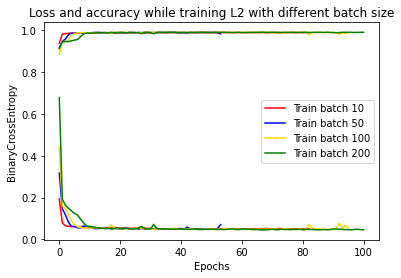

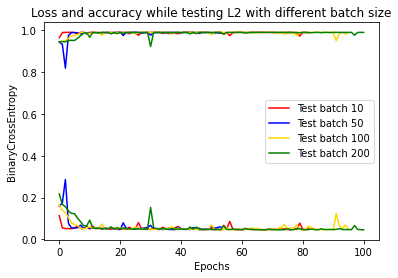

In [0]:
plt.plot(h2_L2['loss'], color = 'red', label = 'Train batch 10')
plt.plot(h2_L2['accuracy'], color = 'red')
plt.plot(h2_L21['loss'], color = 'blue', label = 'Train batch 50')
plt.plot(h2_L21['accuracy'], color = 'blue')
plt.plot(h2_L22['loss'], color = 'gold', label = 'Train batch 100')
plt.plot(h2_L22['accuracy'], color = 'gold')
plt.plot(h2_L23['loss'], color = 'green', label = 'Train batch 200')
plt.plot(h2_L23['accuracy'], color = 'green')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('BinaryCrossEntropy')
plt.title('Loss and accuracy while training L2 with different batch size')
plt.show()
plt.plot(h2_L2['val_loss'], color = 'red', label = 'Test batch 10')
plt.plot(h2_L2['val_accuracy'], color = 'red')
plt.plot(h2_L21['val_loss'], color = 'blue', label = 'Test batch 50')
plt.plot(h2_L21['val_accuracy'], color = 'blue')
plt.plot(h2_L22['val_loss'], color = 'gold', label = 'Test batch 100')
plt.plot(h2_L22['val_accuracy'], color = 'gold')
plt.plot(h2_L23['val_loss'], color = 'green', label = 'Test batch 200')
plt.plot(h2_L23['val_accuracy'], color = 'green')
plt.xlabel('Epochs')
plt.ylabel('BinaryCrossEntropy')
plt.title('Loss and accuracy while testing L2 with different batch size')
plt.legend()
plt.show()

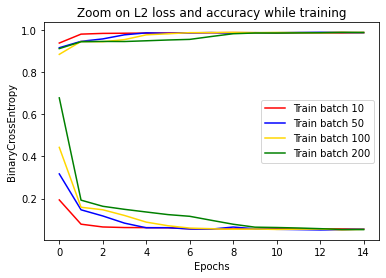

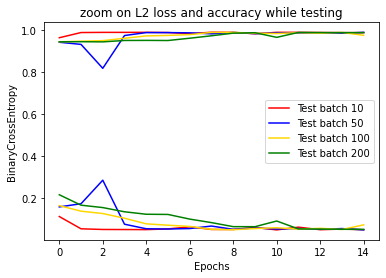

In [0]:
plt.plot(h2_L2['loss'][:15], color = 'red', label = 'Train batch 10')
plt.plot(h2_L2['accuracy'][:15], color = 'red')
plt.plot(h2_L21['loss'][:15], color = 'blue', label = 'Train batch 50')
plt.plot(h2_L21['accuracy'][:15], color = 'blue')
plt.plot(h2_L22['loss'][:15], color = 'gold', label = 'Train batch 100')
plt.plot(h2_L22['accuracy'][:15], color = 'gold')
plt.plot(h2_L23['loss'][:15], color = 'green', label = 'Train batch 200')
plt.plot(h2_L23['accuracy'][:15], color = 'green')
plt.xlabel('Epochs')
plt.ylabel('BinaryCrossEntropy')
plt.title('Zoom on L2 loss and accuracy while training')
plt.legend()
plt.show()
plt.plot(h2_L2['val_loss'][:15], color = 'red', label = 'Test batch 10')
plt.plot(h2_L2['val_accuracy'][:15], color = 'red')
plt.plot(h2_L21['val_loss'][:15], color = 'blue', label = 'Test batch 50')
plt.plot(h2_L21['val_accuracy'][:15], color = 'blue')
plt.plot(h2_L22['val_loss'][:15], color = 'gold', label = 'Test batch 100')
plt.plot(h2_L22['val_accuracy'][:15], color = 'gold')
plt.plot(h2_L23['val_loss'][:15], color = 'green', label = 'Test batch 200')
plt.plot(h2_L23['val_accuracy'][:15], color = 'green')
plt.xlabel('Epochs')
plt.ylabel('BinaryCrossEntropy')
plt.title('zoom on L2 loss and accuracy while testing')
plt.legend()
plt.show()

In [0]:
#batch size 10. passa alla fase successiva h2_L2

In [0]:
L23_model = build_L2_model3()
h3_L2 = L23_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=10, callbacks=[esl2, mcl2]).history
L23_model1 = build_L2_model3()                    
h3_L21 = L23_model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=50, callbacks=[esl2, mcl2]).history
L23_model2 = build_L2_model3()                    
h3_L22 = L23_model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=100, callbacks=[esl2, mcl2]).history
L23_model3 = build_L2_model3()                    
h3_L23 = L23_model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=200, callbacks=[esl2, mcl2]).history

Train on 11513 samples, validate on 4935 samples
Epoch 1/500
11513/11513 [==============================] - 2s 170us/step - loss: 0.1643 - custom_accuracy: 0.9399 - accuracy: 0.9399 - val_loss: 0.1173 - val_custom_accuracy: 0.9476 - val_accuracy: 0.9475
Epoch 2/500
11513/11513 [==============================] - 2s 153us/step - loss: 0.1164 - custom_accuracy: 0.9548 - accuracy: 0.9547 - val_loss: 0.1066 - val_custom_accuracy: 0.9682 - val_accuracy: 0.9682
Epoch 3/500
11513/11513 [==============================] - 2s 155us/step - loss: 0.0874 - custom_accuracy: 0.9731 - accuracy: 0.9731 - val_loss: 0.0697 - val_custom_accuracy: 0.9832 - val_accuracy: 0.9832
Epoch 4/500
11513/11513 [==============================] - 2s 154us/step - loss: 0.0749 - custom_accuracy: 0.9793 - accuracy: 0.9792 - val_loss: 0.0629 - val_custom_accuracy: 0.9824 - val_accuracy: 0.9824
Epoch 5/500
11513/11513 [==============================] - 2s 151us/step - loss: 0.0664 - custom_accuracy: 0.9834 - accuracy: 0.983

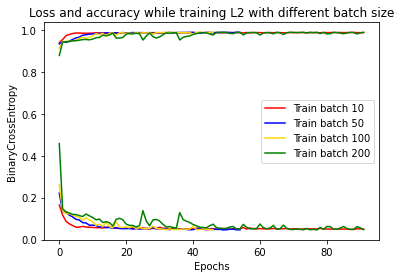

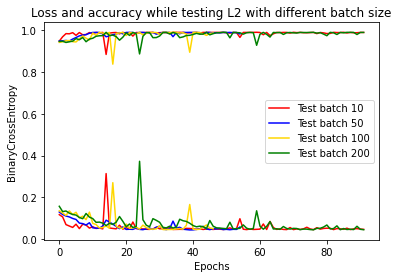

In [0]:
plt.plot(h3_L2['loss'], color = 'red', label = 'Train batch 10')
plt.plot(h3_L2['accuracy'], color = 'red')
plt.plot(h3_L21['loss'], color = 'blue', label = 'Train batch 50')
plt.plot(h3_L21['accuracy'], color = 'blue')
plt.plot(h3_L22['loss'], color = 'gold', label = 'Train batch 100')
plt.plot(h3_L22['accuracy'], color = 'gold')
plt.plot(h3_L23['loss'], color = 'green', label = 'Train batch 200')
plt.plot(h3_L23['accuracy'], color = 'green')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('BinaryCrossEntropy')
plt.title('Loss and accuracy while training L2 with different batch size')
plt.show()
plt.plot(h3_L2['val_loss'], color = 'red', label = 'Test batch 10')
plt.plot(h3_L2['val_accuracy'], color = 'red')
plt.plot(h3_L21['val_loss'], color = 'blue', label = 'Test batch 50')
plt.plot(h3_L21['val_accuracy'], color = 'blue')
plt.plot(h3_L22['val_loss'], color = 'gold', label = 'Test batch 100')
plt.plot(h3_L22['val_accuracy'], color = 'gold')
plt.plot(h3_L23['val_loss'], color = 'green', label = 'Test batch 200')
plt.plot(h3_L23['val_accuracy'], color = 'green')
plt.xlabel('Epochs')
plt.ylabel('BinaryCrossEntropy')
plt.title('Loss and accuracy while testing L2 with different batch size')
plt.legend()
plt.show()

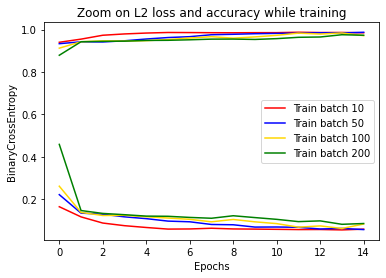

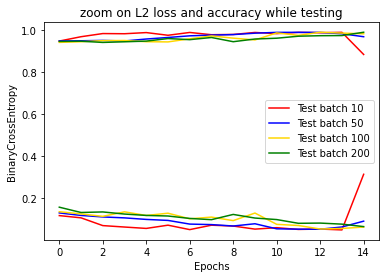

In [0]:
plt.plot(h3_L2['loss'][:15], color = 'red', label = 'Train batch 10')
plt.plot(h3_L2['accuracy'][:15], color = 'red')
plt.plot(h3_L21['loss'][:15], color = 'blue', label = 'Train batch 50')
plt.plot(h3_L21['accuracy'][:15], color = 'blue')
plt.plot(h3_L22['loss'][:15], color = 'gold', label = 'Train batch 100')
plt.plot(h3_L22['accuracy'][:15], color = 'gold')
plt.plot(h3_L23['loss'][:15], color = 'green', label = 'Train batch 200')
plt.plot(h3_L23['accuracy'][:15], color = 'green')
plt.xlabel('Epochs')
plt.ylabel('BinaryCrossEntropy')
plt.title('Zoom on L2 loss and accuracy while training')
plt.legend()
plt.show()
plt.plot(h3_L2['val_loss'][:15], color = 'red', label = 'Test batch 10')
plt.plot(h3_L2['val_accuracy'][:15], color = 'red')
plt.plot(h3_L21['val_loss'][:15], color = 'blue', label = 'Test batch 50')
plt.plot(h3_L21['val_accuracy'][:15], color = 'blue')
plt.plot(h3_L22['val_loss'][:15], color = 'gold', label = 'Test batch 100')
plt.plot(h3_L22['val_accuracy'][:15], color = 'gold')
plt.plot(h3_L23['val_loss'][:15], color = 'green', label = 'Test batch 200')
plt.plot(h3_L23['val_accuracy'][:15], color = 'green')
plt.xlabel('Epochs')
plt.ylabel('BinaryCrossEntropy')
plt.title('zoom on L2 loss and accuracy while testing')
plt.legend()
plt.show()

In [0]:
# PASSA ALLA FASE SUCCESSIVA h3_L2

ALLA FINE DEL GIRONE DI ELIMINAZIONE, ANDIAMO ALLA FASE FINALE PER DECRETARE IL MIGLIOR MODELLO TRA QUELLI CHE HANNO PASSATO LA SELEZIONE

In [0]:
#COME REGOLA GENERALE, METTENDO GLI L2 REGULIZER SI PUò DIMINIURE IL BATCH SIZE

In [0]:
L2_model = build_L2_model()
h_L2 = L2_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=10, callbacks=[esl2, mcl2]).history
L21_model = build_L2_model1()
h1_L2 = L21_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=10, callbacks=[esl2, mcl2]).history
L22_model = build_L2_model2()
h2_L2 = L22_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=10, callbacks=[esl2, mcl2]).history
L23_model = build_L2_model3()
h3_L2 = L23_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=10, callbacks=[esl2, mcl2]).history

Train on 11513 samples, validate on 4935 samples
Epoch 1/500
11513/11513 [==============================] - 2s 168us/step - loss: 0.3713 - custom_accuracy: 0.8692 - accuracy: 0.8691 - val_loss: 0.2570 - val_custom_accuracy: 0.9510 - val_accuracy: 0.9510
Epoch 2/500
11513/11513 [==============================] - 2s 152us/step - loss: 0.2118 - custom_accuracy: 0.9740 - accuracy: 0.9739 - val_loss: 0.1742 - val_custom_accuracy: 0.9743 - val_accuracy: 0.9743
Epoch 3/500
11513/11513 [==============================] - 2s 153us/step - loss: 0.1503 - custom_accuracy: 0.9842 - accuracy: 0.9844 - val_loss: 0.1260 - val_custom_accuracy: 0.9879 - val_accuracy: 0.9878
Epoch 4/500
11513/11513 [==============================] - 2s 154us/step - loss: 0.1178 - custom_accuracy: 0.9846 - accuracy: 0.9846 - val_loss: 0.1035 - val_custom_accuracy: 0.9866 - val_accuracy: 0.9866
Epoch 5/500
11513/11513 [==============================] - 2s 156us/step - loss: 0.1007 - custom_accuracy: 0.9846 - accuracy: 0.984

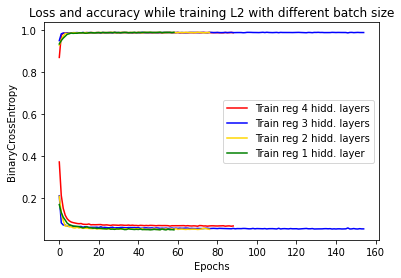

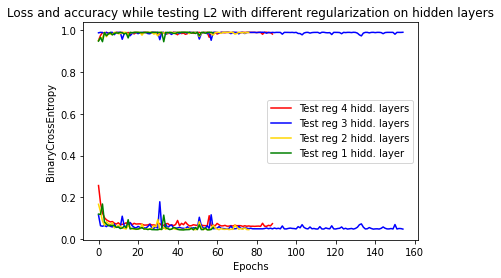

In [0]:
plt.plot(h_L2['loss'], color = 'red', label = 'Train reg 4 hidd. layers')
plt.plot(h_L2['accuracy'], color = 'red')
plt.plot(h1_L2['loss'], color = 'blue', label = 'Train reg 3 hidd. layers')
plt.plot(h1_L2['accuracy'], color = 'blue')
plt.plot(h2_L2['loss'], color = 'gold', label = 'Train reg 2 hidd. layers')
plt.plot(h2_L2['accuracy'], color = 'gold')
plt.plot(h3_L2['loss'], color = 'green', label = 'Train reg 1 hidd. layer')
plt.plot(h3_L2['accuracy'], color = 'green')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('BinaryCrossEntropy')
plt.title('Loss and accuracy while training L2 with different batch size')
plt.show()
plt.plot(h_L2['val_loss'], color = 'red', label = 'Test reg 4 hidd. layers')
plt.plot(h_L2['val_accuracy'], color = 'red')
plt.plot(h1_L2['val_loss'], color = 'blue', label = 'Test reg 3 hidd. layers')
plt.plot(h1_L2['val_accuracy'], color = 'blue')
plt.plot(h2_L2['val_loss'], color = 'gold', label = 'Test reg 2 hidd. layers')
plt.plot(h2_L2['val_accuracy'], color = 'gold')
plt.plot(h3_L2['val_loss'], color = 'green', label = 'Test reg 1 hidd. layer')
plt.plot(h3_L2['val_accuracy'], color = 'green')
plt.xlabel('Epochs')
plt.ylabel('BinaryCrossEntropy')
plt.title('Loss and accuracy while testing L2 with different regularization on hidden layers')
plt.legend()
plt.show()

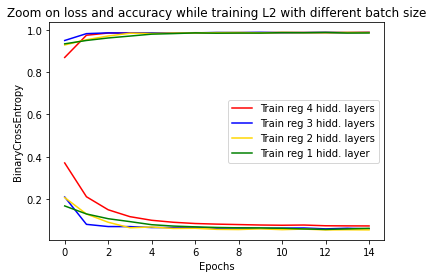

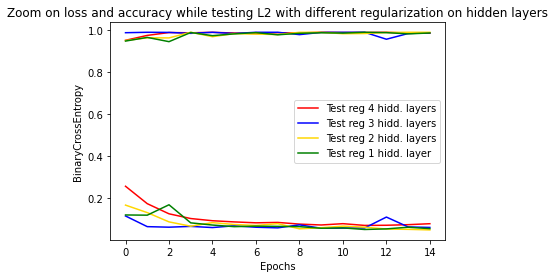

In [0]:
plt.plot(h_L2['loss'][:15], color = 'red', label = 'Train reg 4 hidd. layers')
plt.plot(h_L2['accuracy'][:15], color = 'red')
plt.plot(h1_L2['loss'][:15], color = 'blue', label = 'Train reg 3 hidd. layers')
plt.plot(h1_L2['accuracy'][:15], color = 'blue')
plt.plot(h2_L2['loss'][:15], color = 'gold', label = 'Train reg 2 hidd. layers')
plt.plot(h2_L2['accuracy'][:15], color = 'gold')
plt.plot(h3_L2['loss'][:15], color = 'green', label = 'Train reg 1 hidd. layer')
plt.plot(h3_L2['accuracy'][:15], color = 'green')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('BinaryCrossEntropy')
plt.title('Zoom on loss and accuracy while training L2 with different batch size')
plt.show()
plt.plot(h_L2['val_loss'][:15], color = 'red', label = 'Test reg 4 hidd. layers')
plt.plot(h_L2['val_accuracy'][:15], color = 'red')
plt.plot(h1_L2['val_loss'][:15], color = 'blue', label = 'Test reg 3 hidd. layers')
plt.plot(h1_L2['val_accuracy'][:15], color = 'blue')
plt.plot(h2_L2['val_loss'][:15], color = 'gold', label = 'Test reg 2 hidd. layers')
plt.plot(h2_L2['val_accuracy'][:15], color = 'gold')
plt.plot(h3_L2['val_loss'][:15], color = 'green', label = 'Test reg 1 hidd. layer')
plt.plot(h3_L2['val_accuracy'][:15], color = 'green')
plt.xlabel('Epochs')
plt.ylabel('BinaryCrossEntropy')
plt.title('Zoom on loss and accuracy while testing L2 with different regularization on hidden layers')
plt.legend()
plt.show()

In [0]:
#IL MODELLO MIGLIORE E'.....

In [0]:
test_loss, test_custom_acc, test_acc = L2_model.evaluate(X_test, y_test)
test_loss_1, test_custom_acc_1, test_acc_1 = L21_model.evaluate(X_test, y_test)
test_loss_2, test_custom_acc_2, test_acc_2 = L22_model.evaluate(X_test, y_test)
test_loss_3, test_custom_acc_3, test_acc_3 = L23_model.evaluate(X_test, y_test)

print('Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss, test_custom_acc, test_acc))
print('Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_1, test_custom_acc_1, test_acc_1))
print('Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_2, test_custom_acc_2, test_acc_2))
print('Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_3, test_custom_acc_3, test_acc_3))

4935/4935 [==============================] - 0s 19us/step
Loss 0.074852, Custom Accuracy 0.981048, Keras Accuracy 0.980952
Loss 0.048904, Custom Accuracy 0.989516, Keras Accuracy 0.989463
Loss 0.046156, Custom Accuracy 0.988911, Keras Accuracy 0.988855
Loss 0.056125, Custom Accuracy 0.987097, Keras Accuracy 0.987031


In [0]:
#il primo!!!

In [0]:
modelli_l2 = [L2_model, L21_model, L22_model, L23_model]
k = 1
for i in modelli_l2:
  print('MODELLO NUMERO: ',k)
  k +=1 
  y_pred = i.predict_classes(X_test)

  print('Accuracy %s' % accuracy_score(y_test, y_pred))
  print('F1-score %s' % f1_score(y_test, y_pred, average=None))
  print(classification_report(y_test, y_pred))

MODELLO NUMERO:  1
Accuracy 0.9809523809523809
F1-score [0.98745328 0.96047098]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3791
           1       0.93      1.00      0.96      1144

    accuracy                           0.98      4935
   macro avg       0.96      0.99      0.97      4935
weighted avg       0.98      0.98      0.98      4935

MODELLO NUMERO:  2
Accuracy 0.9894630192502533
F1-score [0.99310345 0.9776824 ]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3791
           1       0.96      1.00      0.98      1144

    accuracy                           0.99      4935
   macro avg       0.98      0.99      0.99      4935
weighted avg       0.99      0.99      0.99      4935

MODELLO NUMERO:  3
Accuracy 0.9888551165146909
F1-score [0.99270267 0.9764252 ]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      37

In [0]:
y_score = L2_model.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score)
roc_auc0 = auc(fpr0, tpr0)

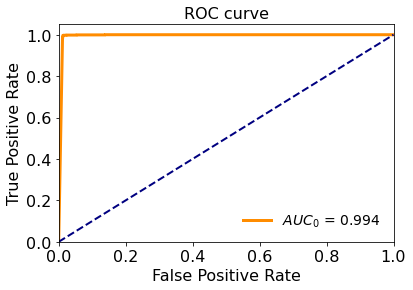

In [0]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

DROPOUT

In [0]:
from keras.layers import Dropout

In [0]:
def build_DROPOUT_model():
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(128, input_dim=n_feature, activation='relu', kernel_initializer = 'uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu', kernel_initializer = 'uniform'))
    model.add(Dropout(0.25))
    model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform'))
    model.add(Dropout(0.25))
    model.add(Dense(16, activation = 'relu', kernel_initializer = 'uniform'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'uniform' ))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[custom_accuracy, 'accuracy'])
    return model
mc = ModelCheckpoint('best_model_DROPOUT.h5', monitor='val_loss', save_best_only=True)

In [0]:
def build_DROPOUT_model1():
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(128, input_dim=n_feature, activation='relu', kernel_initializer = 'uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu', kernel_initializer = 'uniform'))
    model.add(Dropout(0.25))
    model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform'))
    model.add(Dropout(0.25))
    model.add(Dense(16, activation = 'relu', kernel_initializer = 'uniform'))
    model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'uniform' ))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[custom_accuracy,'accuracy'])
    return model

In [0]:
def build_DROPOUT_model2():
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(128, input_dim=n_feature, activation='relu', kernel_initializer = 'uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu', kernel_initializer = 'uniform'))
    model.add(Dropout(0.25))
    model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform'))
    model.add(Dense(16, activation = 'relu', kernel_initializer = 'uniform'))
    model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'uniform' ))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[custom_accuracy, 'accuracy'])
    return model

In [0]:
def build_DROPOUT_model3():
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(128, input_dim=n_feature, activation='relu', kernel_initializer = 'uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu', kernel_initializer = 'uniform'))
    model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform'))
    model.add(Dense(16, activation = 'relu', kernel_initializer = 'uniform'))
    model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'uniform' ))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[custom_accuracy, 'accuracy'])
    return model

In [115]:
DROPOUT_model = build_DROPOUT_model()
h_DROPOUT = DROPOUT_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, callbacks=[es,mc]).history
DROPOUT_model1 = build_DROPOUT_model1()
h_DROPOUT1 = DROPOUT_model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, callbacks=[es,mc]).history
DROPOUT_model2 = build_DROPOUT_model2()
h_DROPOUT2 = DROPOUT_model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, callbacks=[es,mc]).history
DROPOUT_model3 = build_DROPOUT_model3()
h_DROPOUT3 = DROPOUT_model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, callbacks=[es,mc]).history

Train on 11513 samples, validate on 4935 samples
Epoch 1/500
11513/11513 [==============================] - 1s 86us/step - loss: 0.1780 - custom_accuracy: 0.9281 - accuracy: 0.9281 - val_loss: 0.1038 - val_custom_accuracy: 0.9482 - val_accuracy: 0.9479
Epoch 2/500
11513/11513 [==============================] - 1s 64us/step - loss: 0.1103 - custom_accuracy: 0.9537 - accuracy: 0.9537 - val_loss: 0.0787 - val_custom_accuracy: 0.9643 - val_accuracy: 0.9641
Epoch 3/500
11513/11513 [==============================] - 1s 62us/step - loss: 0.0901 - custom_accuracy: 0.9694 - accuracy: 0.9694 - val_loss: 0.0631 - val_custom_accuracy: 0.9760 - val_accuracy: 0.9759
Epoch 4/500
11513/11513 [==============================] - 1s 61us/step - loss: 0.0849 - custom_accuracy: 0.9762 - accuracy: 0.9762 - val_loss: 0.0622 - val_custom_accuracy: 0.9786 - val_accuracy: 0.9785
Epoch 5/500
11513/11513 [==============================] - 1s 62us/step - loss: 0.0780 - custom_accuracy: 0.9787 - accuracy: 0.9787 - v

In [118]:
test_loss, test_custom_acc, test_acc = DROPOUT_model.evaluate(X_test, y_test, batch_size = 10)
test_loss1, test_custom_acc1, test_acc1 = DROPOUT_model.evaluate(X_test, y_test, batch_size = 50)
test_loss2, test_custom_acc2, test_acc2 = DROPOUT_model.evaluate(X_test, y_test, batch_size = 100)
test_loss3, test_custom_acc3, test_acc3 = DROPOUT_model.evaluate(X_test, y_test, batch_size = 150)
test_loss4, test_custom_acc4, test_acc4 = DROPOUT_model.evaluate(X_test, y_test, batch_size = 200)
test_loss5, test_custom_acc5, test_acc5 = DROPOUT_model1.evaluate(X_test, y_test, batch_size = 10)
test_loss6, test_custom_acc6, test_acc6 = DROPOUT_model1.evaluate(X_test, y_test, batch_size = 50)
test_loss7, test_custom_acc7, test_acc7 = DROPOUT_model1.evaluate(X_test, y_test, batch_size = 100)
test_loss8, test_custom_acc8, test_acc8 = DROPOUT_model1.evaluate(X_test, y_test, batch_size = 150)
test_loss9, test_custom_acc9, test_acc9 = DROPOUT_model1.evaluate(X_test, y_test, batch_size = 200)
test_loss10, test_custom_acc10, test_acc10 = DROPOUT_model2.evaluate(X_test, y_test, batch_size = 10)
test_loss11, test_custom_acc11, test_acc11 = DROPOUT_model2.evaluate(X_test, y_test, batch_size = 50)
test_loss12, test_custom_acc12, test_acc12 = DROPOUT_model2.evaluate(X_test, y_test, batch_size = 100)
test_loss13, test_custom_acc13, test_acc13 = DROPOUT_model2.evaluate(X_test, y_test, batch_size = 150)
test_loss14, test_custom_acc14, test_acc14 = DROPOUT_model2.evaluate(X_test, y_test, batch_size = 200)
test_loss15, test_custom_acc15, test_acc15 = DROPOUT_model3.evaluate(X_test, y_test, batch_size = 10)
test_loss16, test_custom_acc16, test_acc16 = DROPOUT_model3.evaluate(X_test, y_test, batch_size = 50)
test_loss17, test_custom_acc17, test_acc17 = DROPOUT_model3.evaluate(X_test, y_test, batch_size = 100)
test_loss18, test_custom_acc18, test_acc18 = DROPOUT_model3.evaluate(X_test, y_test, batch_size = 150)
test_loss19, test_custom_acc19, test_acc19 = DROPOUT_model3.evaluate(X_test, y_test, batch_size = 200)

print('numero 1:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss, test_custom_acc, test_acc))
print('numero 2:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss1, test_custom_acc1, test_acc1))
print('numero 3:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss2, test_custom_acc2, test_acc2))
print('numero 4:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss3, test_custom_acc3, test_acc3))
print('numero 5:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss4, test_custom_acc4, test_acc4))
print('numero 6:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss5, test_custom_acc5, test_acc5))
print('numero 7:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss6, test_custom_acc6, test_acc6))
print('numero 8:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss7, test_custom_acc7, test_acc7))
print('numero 9:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss8, test_custom_acc8, test_acc8))
print('numero 10:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss9, test_custom_acc9, test_acc9))
print('numero 11:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss10, test_custom_acc10, test_acc10))
print('numero 12:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss11, test_custom_acc11, test_acc11))
print('numero 13:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss12, test_custom_acc12, test_acc12))
print('numero 14:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss13, test_custom_acc13, test_acc13))
print('numero 15:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss14, test_custom_acc14, test_acc14))
print('numero 16:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss15, test_custom_acc15, test_acc15))
print('numero 17:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss16, test_custom_acc16, test_acc16))
print('numero 18:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss17, test_custom_acc17, test_acc17))
print('numero 19:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss18, test_custom_acc18, test_acc18))
print('numero 20:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss19, test_custom_acc19, test_acc19))

4935/4935 [==============================] - 0s 5us/step
numero 1: Loss 0.051760, Custom Accuracy 0.989473, Keras Accuracy 0.989463
numero 2: Loss 0.051760, Custom Accuracy 0.989409, Keras Accuracy 0.989463
numero 3: Loss 0.051760, Custom Accuracy 0.989229, Keras Accuracy 0.989463
numero 4: Loss 0.051760, Custom Accuracy 0.989450, Keras Accuracy 0.989463
numero 5: Loss 0.051760, Custom Accuracy 0.989407, Keras Accuracy 0.989463
numero 6: Loss 0.076594, Custom Accuracy 0.970849, Keras Accuracy 0.970821
numero 7: Loss 0.076594, Custom Accuracy 0.970823, Keras Accuracy 0.970821
numero 8: Loss 0.076594, Custom Accuracy 0.970828, Keras Accuracy 0.970821
numero 9: Loss 0.076594, Custom Accuracy 0.970819, Keras Accuracy 0.970821
numero 10: Loss 0.076594, Custom Accuracy 0.970815, Keras Accuracy 0.970821
numero 11: Loss 0.048650, Custom Accuracy 0.988866, Keras Accuracy 0.988855
numero 12: Loss 0.048650, Custom Accuracy 0.988802, Keras Accuracy 0.988855
numero 13: Loss 0.048650, Custom Accurac

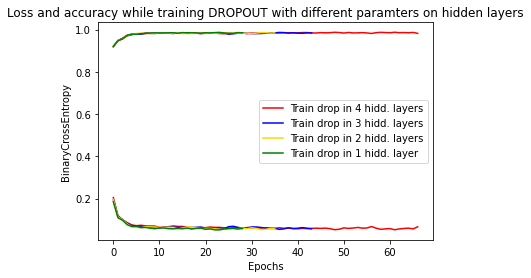

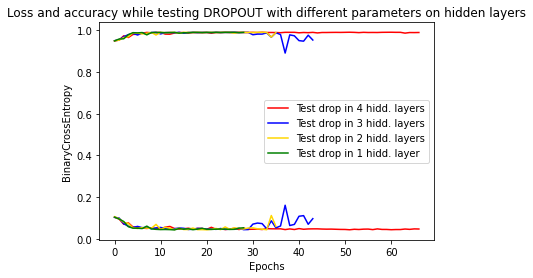

In [102]:
plt.plot(h_DROPOUT['loss'], color = 'red', label = 'Train drop in 4 hidd. layers')
plt.plot(h_DROPOUT['accuracy'], color = 'red')
plt.plot(h_DROPOUT1['loss'], color = 'blue', label = 'Train drop in 3 hidd. layers')
plt.plot(h_DROPOUT1['accuracy'], color = 'blue')
plt.plot(h_DROPOUT2['loss'], color = 'gold', label = 'Train drop in 2 hidd. layers')
plt.plot(h_DROPOUT2['accuracy'], color = 'gold')
plt.plot(h_DROPOUT3['loss'], color = 'green', label = 'Train drop in 1 hidd. layer')
plt.plot(h_DROPOUT3['accuracy'], color = 'green')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('BinaryCrossEntropy')
plt.title('Loss and accuracy while training DROPOUT with different paramters on hidden layers')
plt.show()
plt.plot(h_DROPOUT['val_loss'], color = 'red', label = 'Test drop in 4 hidd. layers')
plt.plot(h_DROPOUT['val_accuracy'], color = 'red')
plt.plot(h_DROPOUT1['val_loss'], color = 'blue', label = 'Test drop in 3 hidd. layers')
plt.plot(h_DROPOUT1['val_accuracy'], color = 'blue')
plt.plot(h_DROPOUT2['val_loss'], color = 'gold', label = 'Test drop in 2 hidd. layers')
plt.plot(h_DROPOUT2['val_accuracy'], color = 'gold')
plt.plot(h_DROPOUT3['val_loss'], color = 'green', label = 'Test drop in 1 hidd. layer')
plt.plot(h_DROPOUT3['val_accuracy'], color = 'green')
plt.xlabel('Epochs')
plt.ylabel('BinaryCrossEntropy')
plt.title('Loss and accuracy while testing DROPOUT with different parameters on hidden layers')
plt.legend()
plt.show()

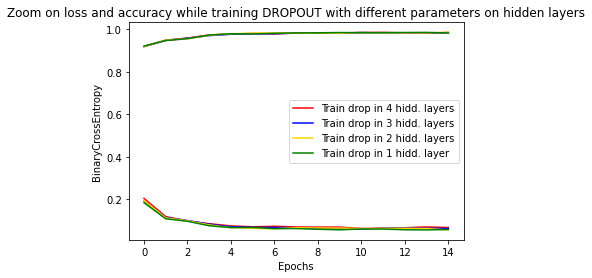

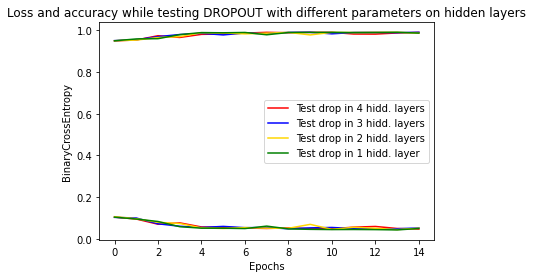

In [103]:
plt.plot(h_DROPOUT['loss'][:15], color = 'red', label = 'Train drop in 4 hidd. layers')
plt.plot(h_DROPOUT['accuracy'][:15], color = 'red')
plt.plot(h_DROPOUT1['loss'][:15], color = 'blue', label = 'Train drop in 3 hidd. layers')
plt.plot(h_DROPOUT1['accuracy'][:15], color = 'blue')
plt.plot(h_DROPOUT2['loss'][:15], color = 'gold', label = 'Train drop in 2 hidd. layers')
plt.plot(h_DROPOUT2['accuracy'][:15], color = 'gold')
plt.plot(h_DROPOUT3['loss'][:15], color = 'green', label = 'Train drop in 1 hidd. layer')
plt.plot(h_DROPOUT3['accuracy'][:15], color = 'green')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('BinaryCrossEntropy')
plt.title('Zoom on loss and accuracy while training DROPOUT with different parameters on hidden layers')
plt.show()
plt.plot(h_DROPOUT['val_loss'][:15], color = 'red', label = 'Test drop in 4 hidd. layers')
plt.plot(h_DROPOUT['val_accuracy'][:15], color = 'red')
plt.plot(h_DROPOUT1['val_loss'][:15], color = 'blue', label = 'Test drop in 3 hidd. layers')
plt.plot(h_DROPOUT1['val_accuracy'][:15], color = 'blue')
plt.plot(h_DROPOUT2['val_loss'][:15], color = 'gold', label = 'Test drop in 2 hidd. layers')
plt.plot(h_DROPOUT2['val_accuracy'][:15], color = 'gold')
plt.plot(h_DROPOUT3['val_loss'][:15], color = 'green', label = 'Test drop in 1 hidd. layer')
plt.plot(h_DROPOUT3['val_accuracy'][:15], color = 'green')
plt.xlabel('Epochs')
plt.ylabel('BinaryCrossEntropy')
plt.title('Loss and accuracy while testing DROPOUT with different parameters on hidden layers')
plt.legend()
plt.show()

In [119]:
#BEST DROPOUT MODEL:
best_DROPOUT_model = build_DROPOUT_model2()
dropout_history = best_DROPOUT_model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 150, epochs=500, callbacks=[es,mc]).history

Train on 11513 samples, validate on 4935 samples
Epoch 1/500
11513/11513 [==============================] - 0s 41us/step - loss: 0.3023 - custom_accuracy: 0.8789 - accuracy: 0.8787 - val_loss: 0.1206 - val_custom_accuracy: 0.9380 - val_accuracy: 0.9380
Epoch 2/500
11513/11513 [==============================] - 0s 19us/step - loss: 0.1236 - custom_accuracy: 0.9421 - accuracy: 0.9421 - val_loss: 0.1051 - val_custom_accuracy: 0.9500 - val_accuracy: 0.9499
Epoch 3/500
11513/11513 [==============================] - 0s 20us/step - loss: 0.1104 - custom_accuracy: 0.9484 - accuracy: 0.9483 - val_loss: 0.0998 - val_custom_accuracy: 0.9506 - val_accuracy: 0.9506
Epoch 4/500
11513/11513 [==============================] - 0s 19us/step - loss: 0.1042 - custom_accuracy: 0.9519 - accuracy: 0.9519 - val_loss: 0.0845 - val_custom_accuracy: 0.9618 - val_accuracy: 0.9617
Epoch 5/500
11513/11513 [==============================] - 0s 19us/step - loss: 0.0854 - custom_accuracy: 0.9672 - accuracy: 0.9672 - v

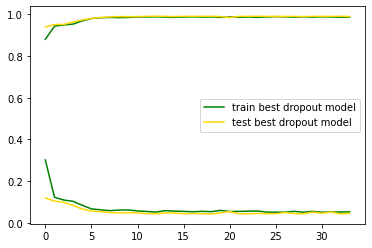

In [120]:
plt.plot(dropout_history['loss'], color = 'green', label = 'train best dropout model')
plt.plot(dropout_history['custom_accuracy'], color = 'green')
plt.plot(dropout_history['val_loss'], color = 'gold', label = 'test best dropout model')
plt.plot(dropout_history['val_custom_accuracy'], color = 'gold')
plt.xlabel = 'Epochs'
plt.ylabel = 'Binary Cross Entropy'
plt.title = 'Performance of best dropout model'
plt.legend()
plt.show()

In [0]:
y_score = best_DROPOUT_model.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score)
roc_auc0 = auc(fpr0, tpr0)

TypeError: ignored

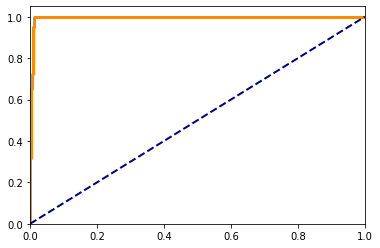

In [126]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [127]:
y_pred = best_DROPOUT_model.predict_classes(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9886524822695035
F1-score [0.99256506 0.9760479 ]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3791
           1       0.96      1.00      0.98      1144

    accuracy                           0.99      4935
   macro avg       0.98      0.99      0.98      4935
weighted avg       0.99      0.99      0.99      4935



PARAGONE MODELLI MIGLIORI

MODELLO NUMERO:  1
Accuracy 0.9886524822695035
F1-score [0.99256506 0.9760479 ]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3791
           1       0.96      1.00      0.98      1144

    accuracy                           0.99      4935
   macro avg       0.98      0.99      0.98      4935
weighted avg       0.99      0.99      0.99      4935



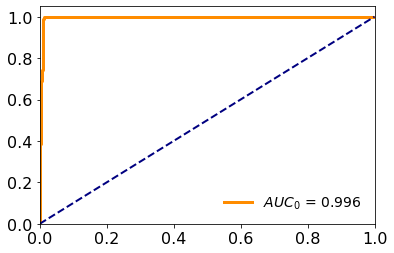

MODELLO NUMERO:  2
Accuracy 0.9896656534954408
F1-score [0.99323518 0.97812098]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3791
           1       0.96      1.00      0.98      1144

    accuracy                           0.99      4935
   macro avg       0.98      0.99      0.99      4935
weighted avg       0.99      0.99      0.99      4935



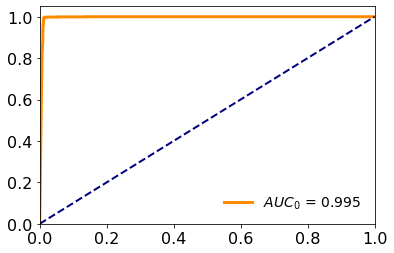

MODELLO NUMERO:  3
Accuracy 0.9880445795339412
F1-score [0.99216363 0.9747971 ]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3791
           1       0.95      1.00      0.97      1144

    accuracy                           0.99      4935
   macro avg       0.98      0.99      0.98      4935
weighted avg       0.99      0.99      0.99      4935



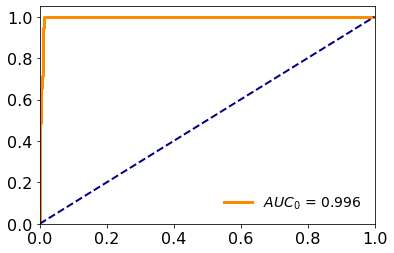

In [134]:
modelli_migliori = [best_DROPOUT_model, L2_model, model2]
k = 1
for model in modelli_migliori:

  print('MODELLO NUMERO: ', k)
  k += 1
  y_pred = model.predict_classes(X_test)

  print('Accuracy %s' % accuracy_score(y_test, y_pred))
  print('F1-score %s' % f1_score(y_test, y_pred, average=None))
  print(classification_report(y_test, y_pred))
  y_score = model.predict_proba(X_test)
  fpr0, tpr0, _ = roc_curve(y_test, y_score)
  roc_auc0 = auc(fpr0, tpr0)
  plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.legend(loc="lower right", fontsize=14, frameon=False)
  plt.tick_params(axis='both', which='major', labelsize=16)
  plt.show()
